In [1]:
%pylab qt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


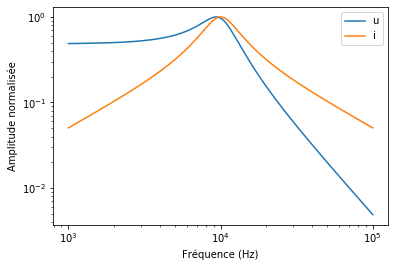

In [33]:
def u_cond(omega, omega0=1, gamma=1, e0=1):
    """Résonance en tension"""
    return e0*omega0**2 / ( (omega0**2-omega**2) + 1j*omega*gamma )

def i_bob(omega, omega0=1, gamma=0, i0=1):
    """Résonance en courant"""
    return 1j*i0*omega*u_cond(omega, omega0=omega0, gamma=gamma, e0=1)

omega0 = 2*np.pi*10e3
Q = 2
if Q is None:
    gamma  = 2*np.pi*0.1e3
else:
    gamma = omega0/Q
omega  = 2*np.pi*np.logspace(3, 5, 1001)


u = np.abs(u_cond(omega, omega0=omega0, gamma=gamma))
i = np.abs(i_bob(omega, omega0=omega0, gamma=gamma))
plt.loglog(omega/2/np.pi, u/u.max(), label="u")
plt.loglog(omega/2/np.pi, i/i.max(), label="i")

plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude normalisée")
plt.legend()

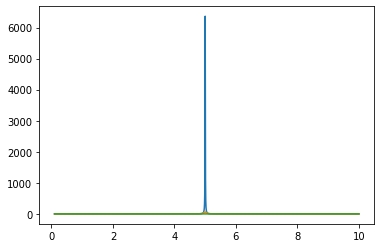

In [34]:
def pendulum(f, f0=1, Q=1):
    return 1 / ( 1 - (f/f0)**2 + 1j*f/f0/Q )

f  = np.logspace(-1,1,100001)

"""
for Q in [0.1, 1, 10, 1000]:
    ft = np.abs(pendulum(f, Q=Q))
    #ft = ft/(ft.max()/Q)
    print(ft.max()/Q)
    plt.loglog(f, ft)
"""

def lorentz(f, f0=1, gamma=1, scale=1):
    return scale * 2/np.pi/gamma / (1 + (2*(f-f0)/gamma)**2)

for gamma in [0.01,0.1,1]:
    scale = 1/gamma
    plt.plot(f, lorentz(f, f0=5, gamma=gamma, scale=scale))
